In [11]:
### 공장 데이터 수집
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../DATA/factory_2112.csv', encoding='utf-8')
data

,TOC번호,수용가번호,법정동분류코드,측정일자,측정시각,SG전력사용량,전체전력사용량
0,癤풢000000002,IMC0000011SK00200002,5013011900,20211201,1,0.0000,0.000
1,E000000002,IMC0000016SK00200002,4223012100,20211201,1,793.5440,793.544
2,E000000002,IMC0000026CM04300001,4313011900,20211201,1,456.0000,456.000
3,E000000002,IMC0000032CM05200001,3171025000,20211201,1,313.0440,313.044
4,E000000002,IMC0000040IN04100001,4420036000,20211201,1,241.7180,241.718
...,...,...,...,...,...,...,...
290208,E000000004,1362,2771000000,20211231,23,0.9660,0.000
290209,E000000004,1364,2723000000,20211231,23,20.5080,0.000
290210,E000000004,1397,2726000000,20211231,23,9.4486,0.000
290211,E000000004,1462,2726000000,20211231,23,30.7080,0.000


In [65]:
data['수용가번호'].value_counts()

수용가번호
1210    744
1141    744
1274    744
1129    744
1254    744
       ... 
1265    724
1337    724
1338    724
1340    724
1286    724
Name: count, Length: 345, dtype: int64

In [13]:
# '수용가번호' value_counts가 700 이상인 것만 추출
flag = data['수용가번호'].value_counts() > 700
flag = flag[flag].index
data = data[data['수용가번호'].isin(flag)]
print(data.shape)

(252101, 7)


In [17]:
# SG 데이터가 20000 이상인 데이터
data_20 = data[data['SG전력사용량'] > 10000]
data_20['수용가번호'].value_counts()

수용가번호
1040    644
1033    399
Name: count, dtype: int64

---
시간당 전력사용량이 10,000 이상인 경우는 1040, 1033 두 가지의 종류가 나옴, 우선 이 두 가지를 분석

---

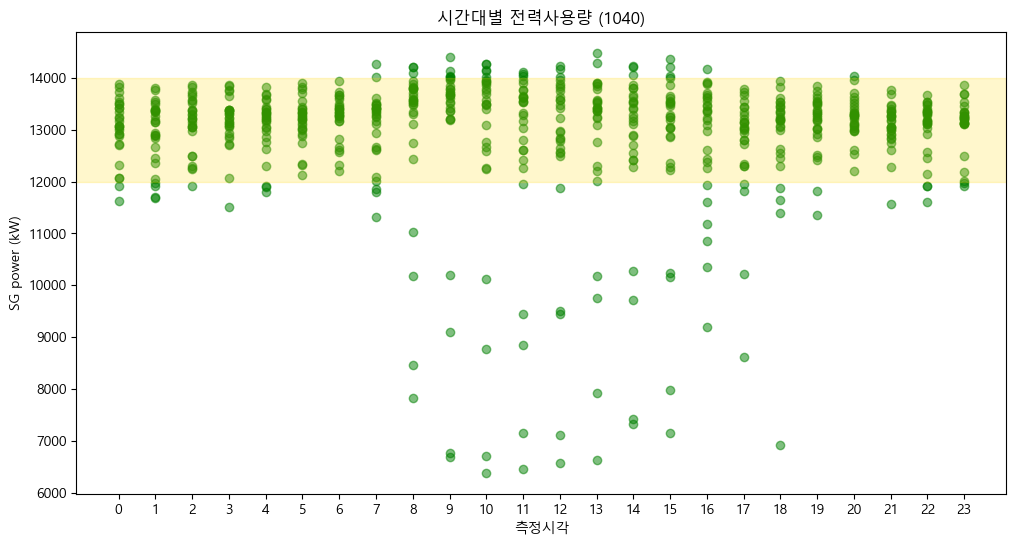

In [64]:
# 수용가 번호가 1040
data_1040 = data[data['수용가번호'] == '1040']
# data가 0인 데이터 제거
data_1040 = data_1040[data_1040['SG전력사용량'] > 4000]
# 일자별 SG전력사용량
plt.figure(figsize=(12, 6))
for date in data_1040['측정일자'].unique():
    data_1040_date = data_1040[data_1040['측정일자'] == date]
    # plt.plot(data_1040_date['측정시각'], data_1040_date['SG전력사용량'], label=date, alpha=0.5, color = 'green')
    plt.scatter(data_1040_date['측정시각'], data_1040_date['SG전력사용량'], alpha=0.5, color = 'green')

plt.axhspan(12000, 14000, color='gold', alpha=0.2)
plt.xlabel('측정시각')
plt.xticks(range(24), range(24))
plt.ylabel('SG power (kW)')
plt.title("시간대별 전력사용량 (1040)")
plt.show()


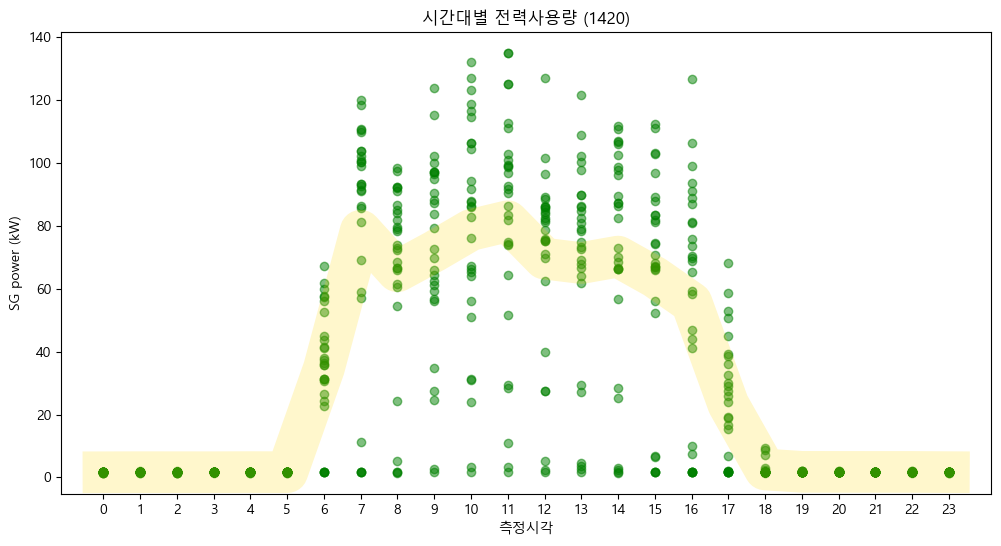

In [108]:
# 수용가 번호가 1033
data_1033 = data[data['수용가번호'] == '1420']
# data가 0인 데이터 제거
data_1033 = data_1033[data_1033['SG전력사용량'] > 0]
# 일자별 SG전력사용량
plt.figure(figsize=(12, 6))
for date in data_1033['측정일자'].unique():
    data_1033_date = data_1033[data_1033['측정일자'] == date]
    # plt.plot(data_1033_date['측정시각'], data_1033_date['SG전력사용량'], label=date, alpha=0.5, color = 'blue')
    plt.scatter(data_1033_date['측정시각'], data_1033_date['SG전력사용량'], alpha=0.5, color = 'green')

# 측정 시간별 평균 SG전력사용량
data_1033_mean = data_1033.groupby('측정시각')['SG전력사용량'].mean()

plt.plot(data_1033_mean.index, data_1033_mean.values, color='gold', label='평균', alpha=0.2, linewidth=30)
    
# plt.axhspan(12000, 14000, color='gold', alpha=0.2)
plt.xlabel('측정시각')
plt.xticks(range(24), range(24))
plt.ylabel('SG power (kW)')
plt.title("시간대별 전력사용량 (1420)")
plt.show()

In [100]:
data_1033.sum()

#  합계 : 21897.36, 학교의 1/10


TOC번호      E000000004E000000004E000000004E000000004E00000...
수용가번호      1420142014201420142014201420142014201420142014...
법정동분류코드                                        1825824000000
측정일자                                             13581936792
측정시각                                                    7728
SG전력사용량                                             21897.36
전체전력사용량                                                  0.0
dtype: object

In [109]:
# 수용가번호 기준 SG전력사용량 합계를 구했을 때, 합계가 150000 ~ 200000 사이인 수용가번호를 추출
data_sum = data.groupby('수용가번호')['SG전력사용량'].sum()
data_sum = data_sum[(data_sum > 150000) & (data_sum < 200000)]

data_sum

수용가번호
1017    166486.1440
1046    161212.5900
1057    153959.2082
1069    165621.3215
1134    161285.5201
1148    160093.2600
1150    190265.6400
1191    189180.3100
1223    169930.2000
1225    173088.9600
1233    178928.4000
1249    178928.4000
1304    152148.9600
1332    184201.5900
1349    178928.4000
1374    169454.8500
1409    187101.7000
Name: SG전력사용량, dtype: float64

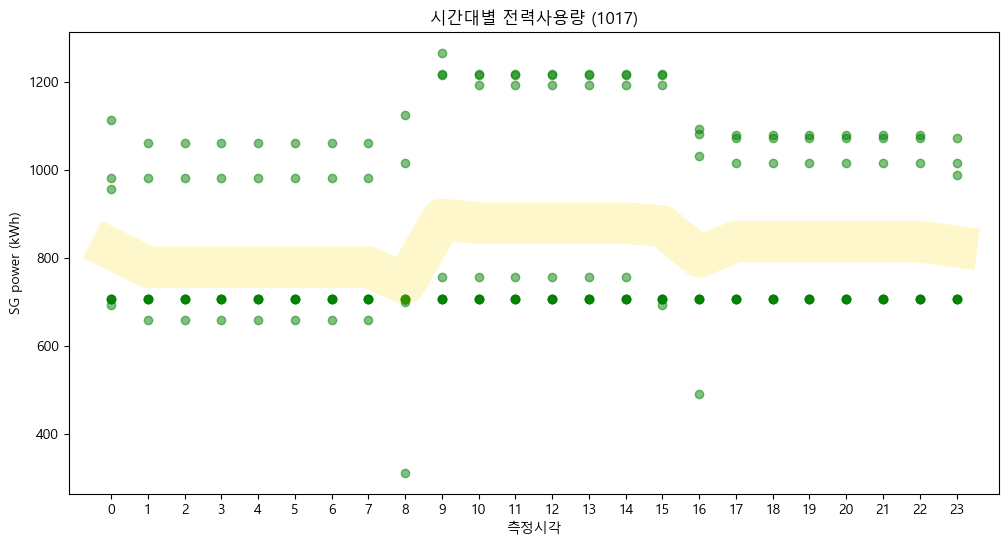

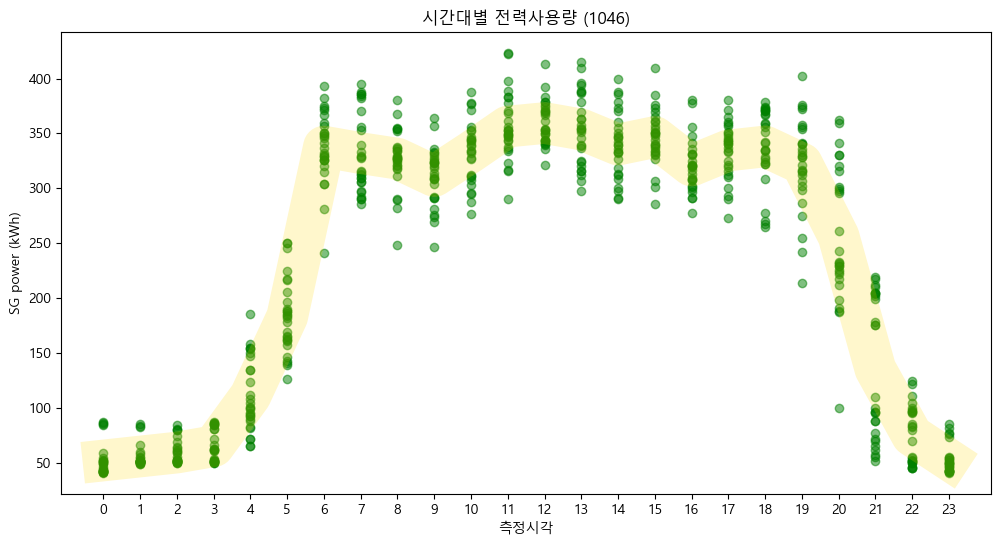

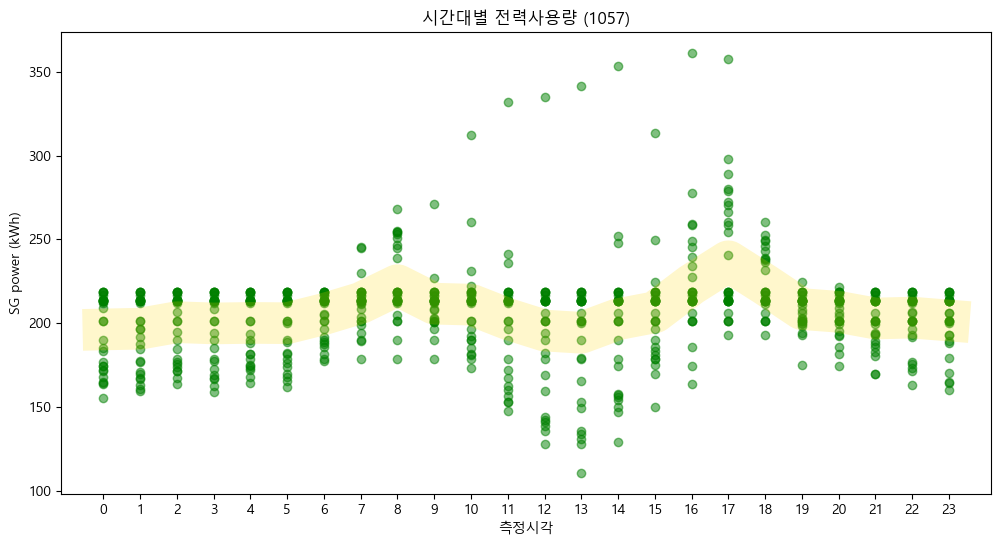

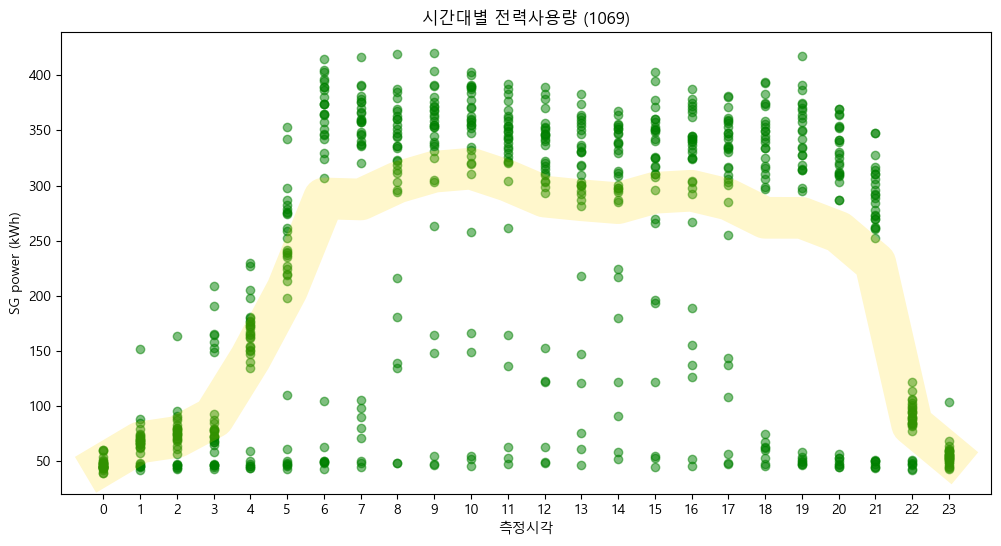

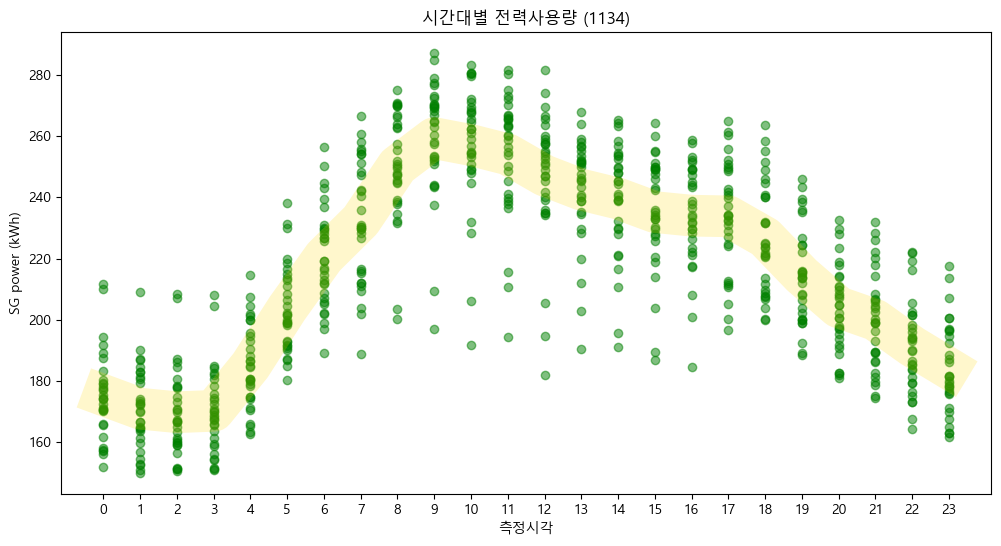

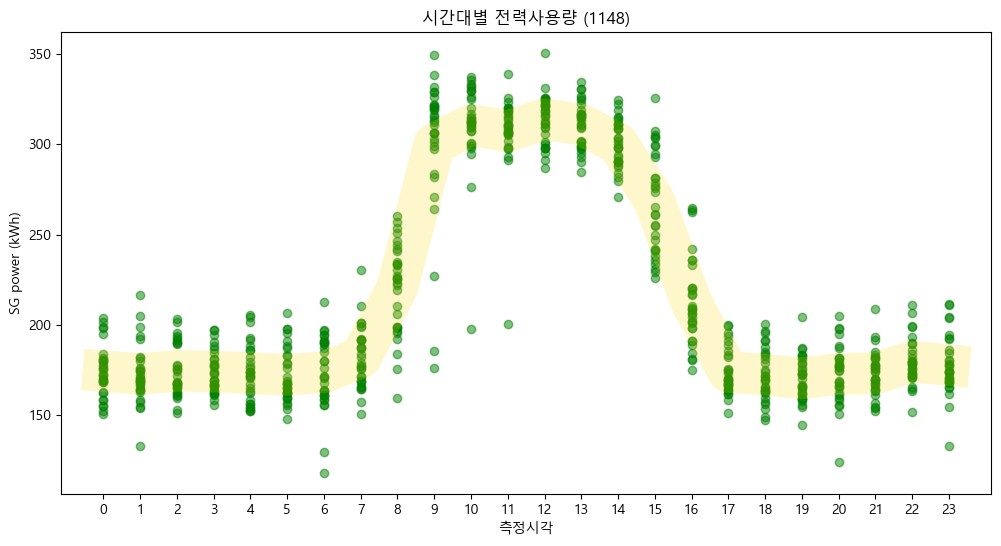

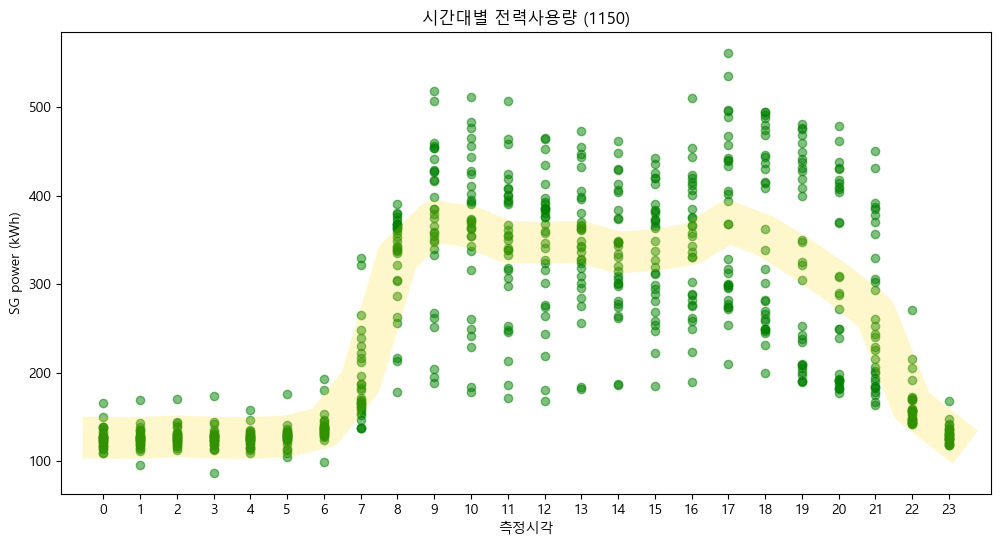

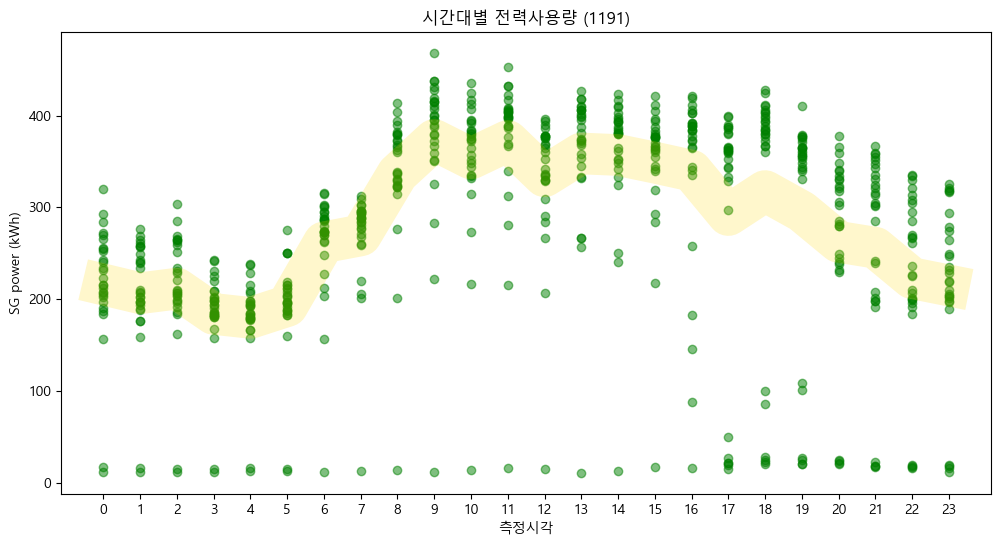

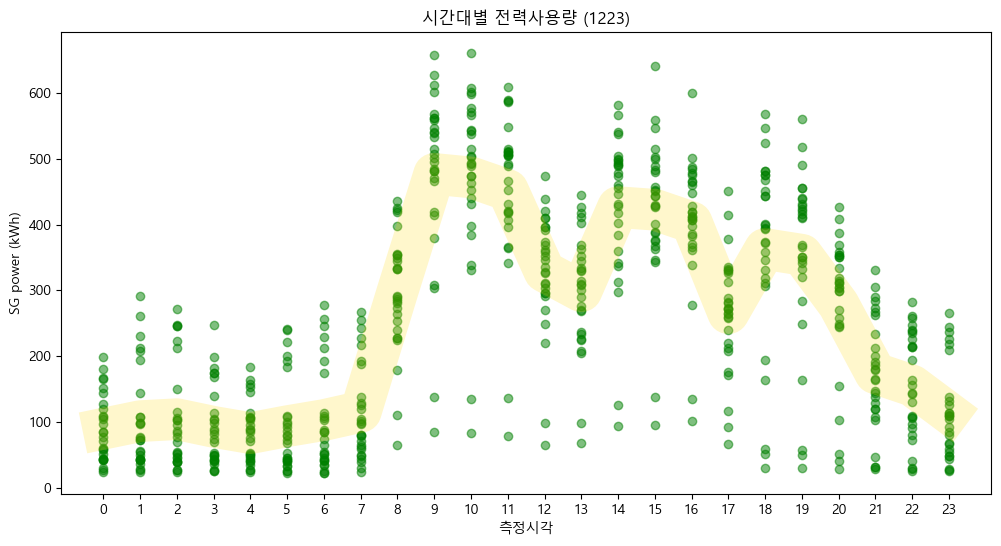

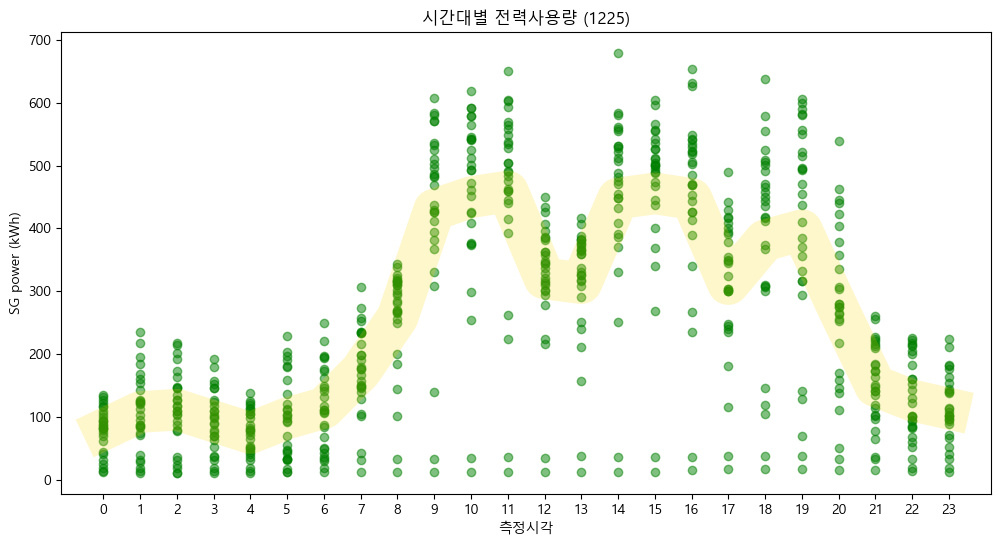

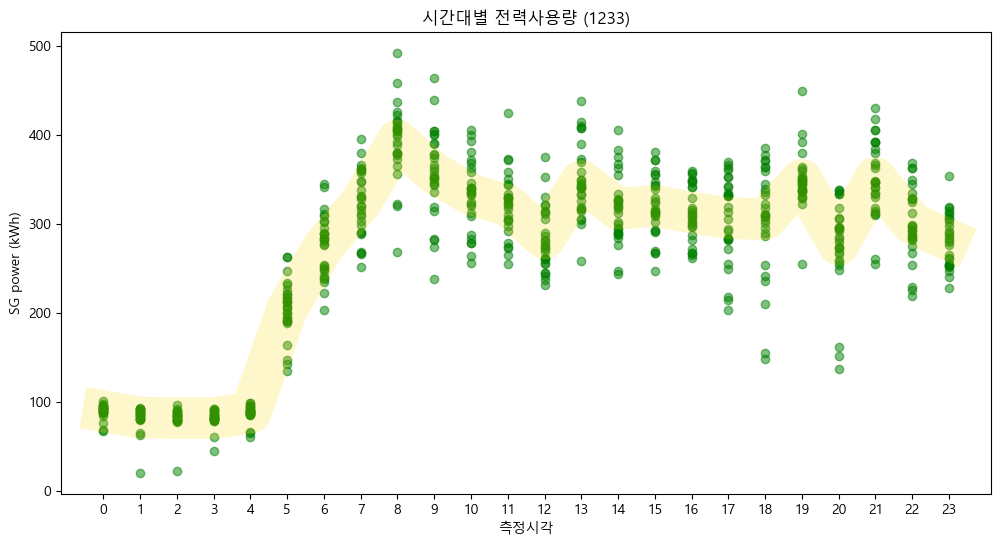

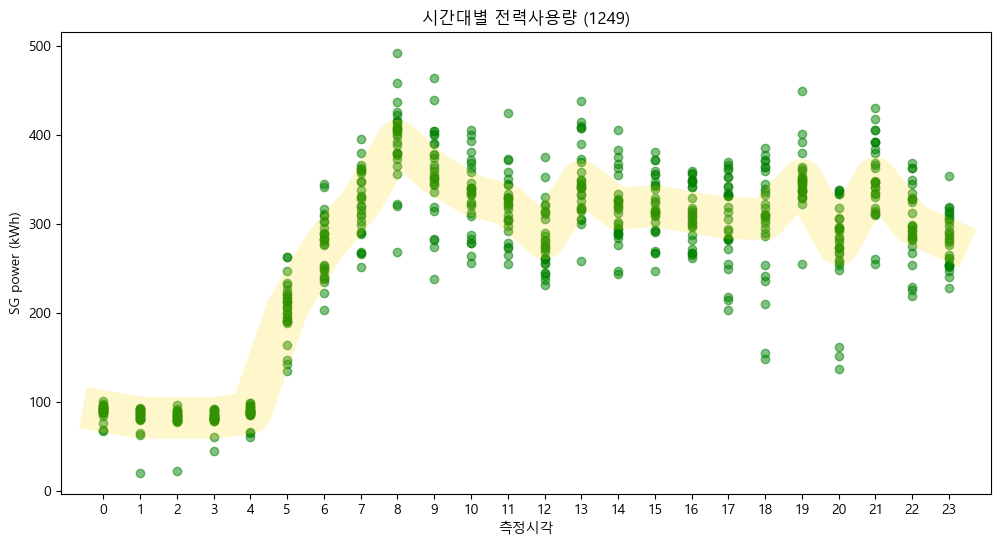

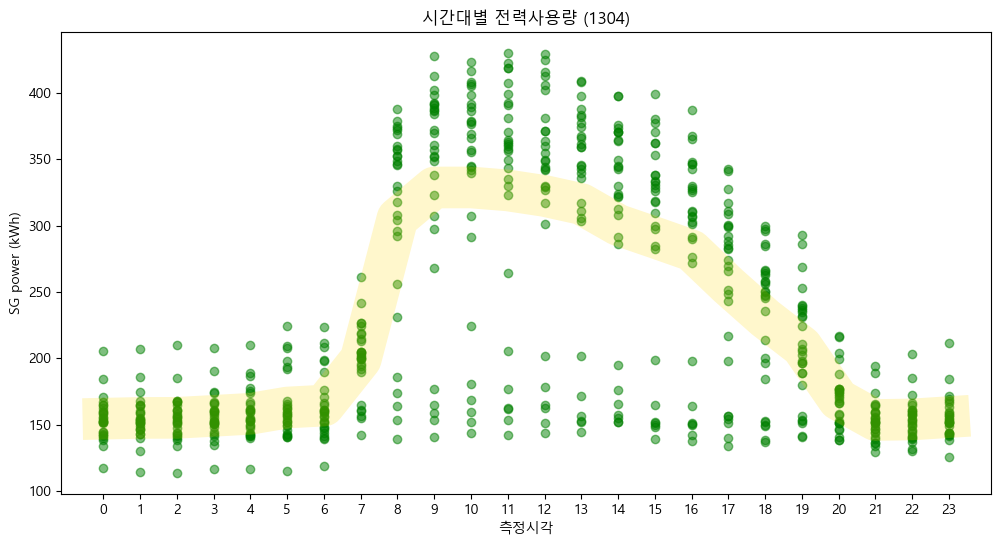

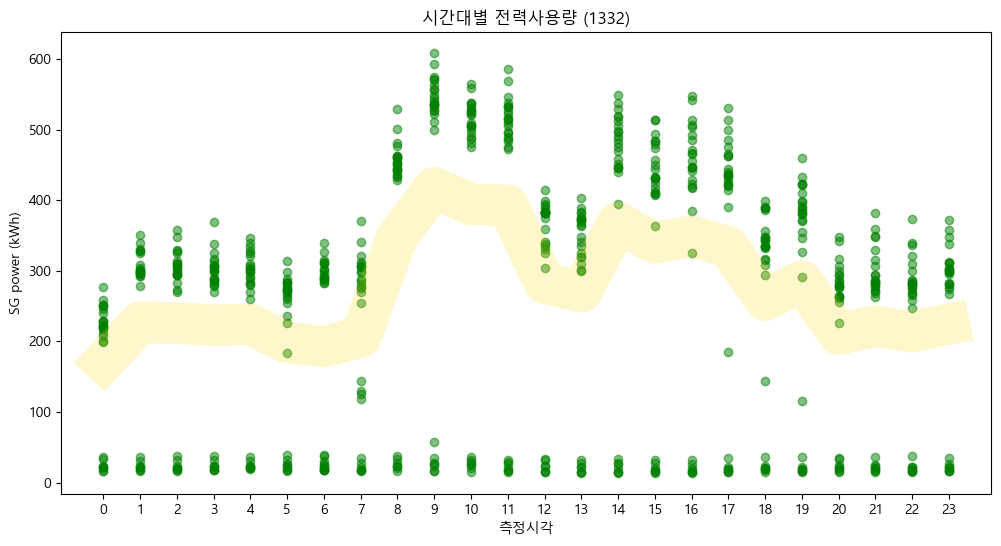

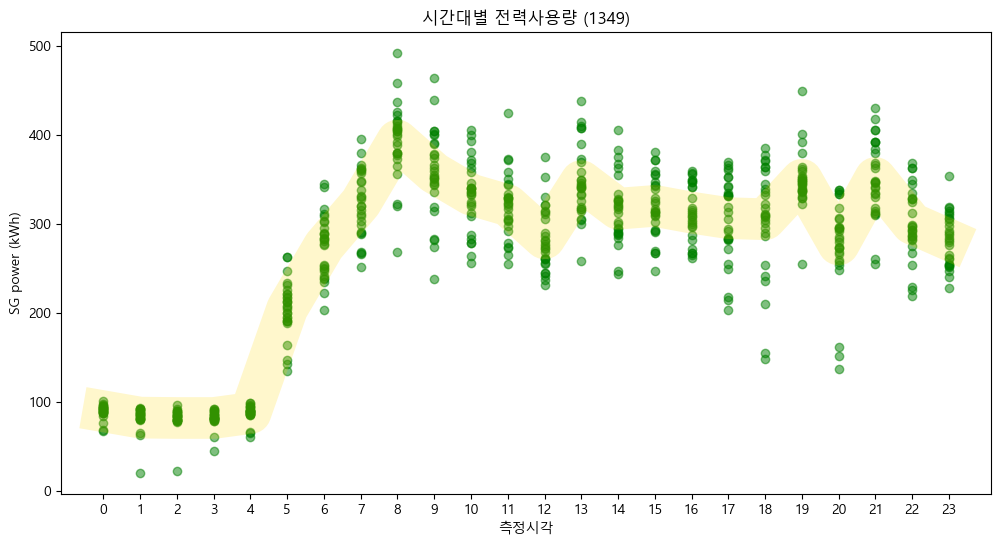

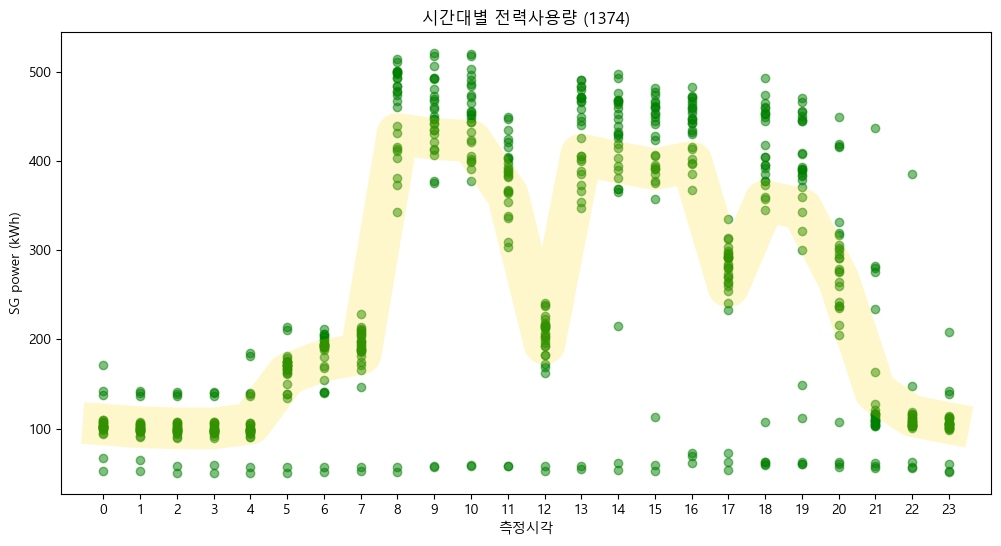

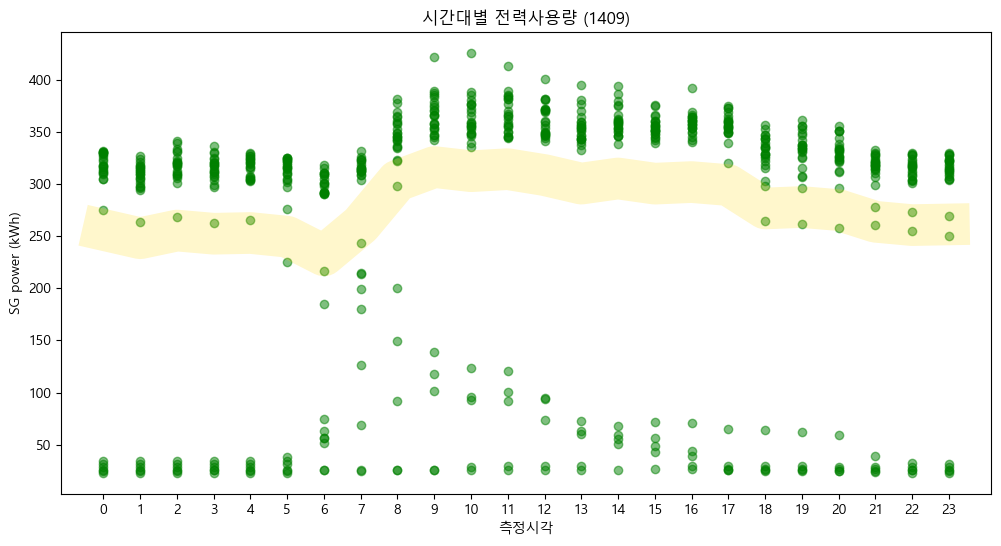

In [128]:
indexes = data_sum.index
data_150_200 = data[data['수용가번호'].isin(indexes)]

for num in indexes:
    data_num = data_150_200[data_150_200['수용가번호'] == num]
    # data가 0인 데이터 제거
    data_num = data_num[data_num['SG전력사용량'] > 0]
    # 일자별 SG전력사용량
    plt.figure(figsize=(12, 6))
    for date in data_num['측정일자'].unique():
        data_num_date = data_num[data_num['측정일자'] == date]
        # plt.plot(data_num_date['측정시각'], data_num_date['SG전력사용량'], label=date, alpha=0.5, color = 'green')
        plt.scatter(data_num_date['측정시각'], data_num_date['SG전력사용량'], alpha=0.5, color = 'green')
    
    # 측정 시간별 평균 SG전력사용량
    data_num_mean = data_num.groupby('측정시각')['SG전력사용량'].mean()
    
    plt.plot(data_num_mean.index, data_num_mean.values, color='gold', label='평균', alpha=0.2, linewidth=30)
    
    plt.xlabel('측정시각')
    plt.xticks(range(24), range(24))
    plt.ylabel('SG power (kWh)')
    plt.title(f"시간대별 전력사용량 ({num})")
    plt.show()
    


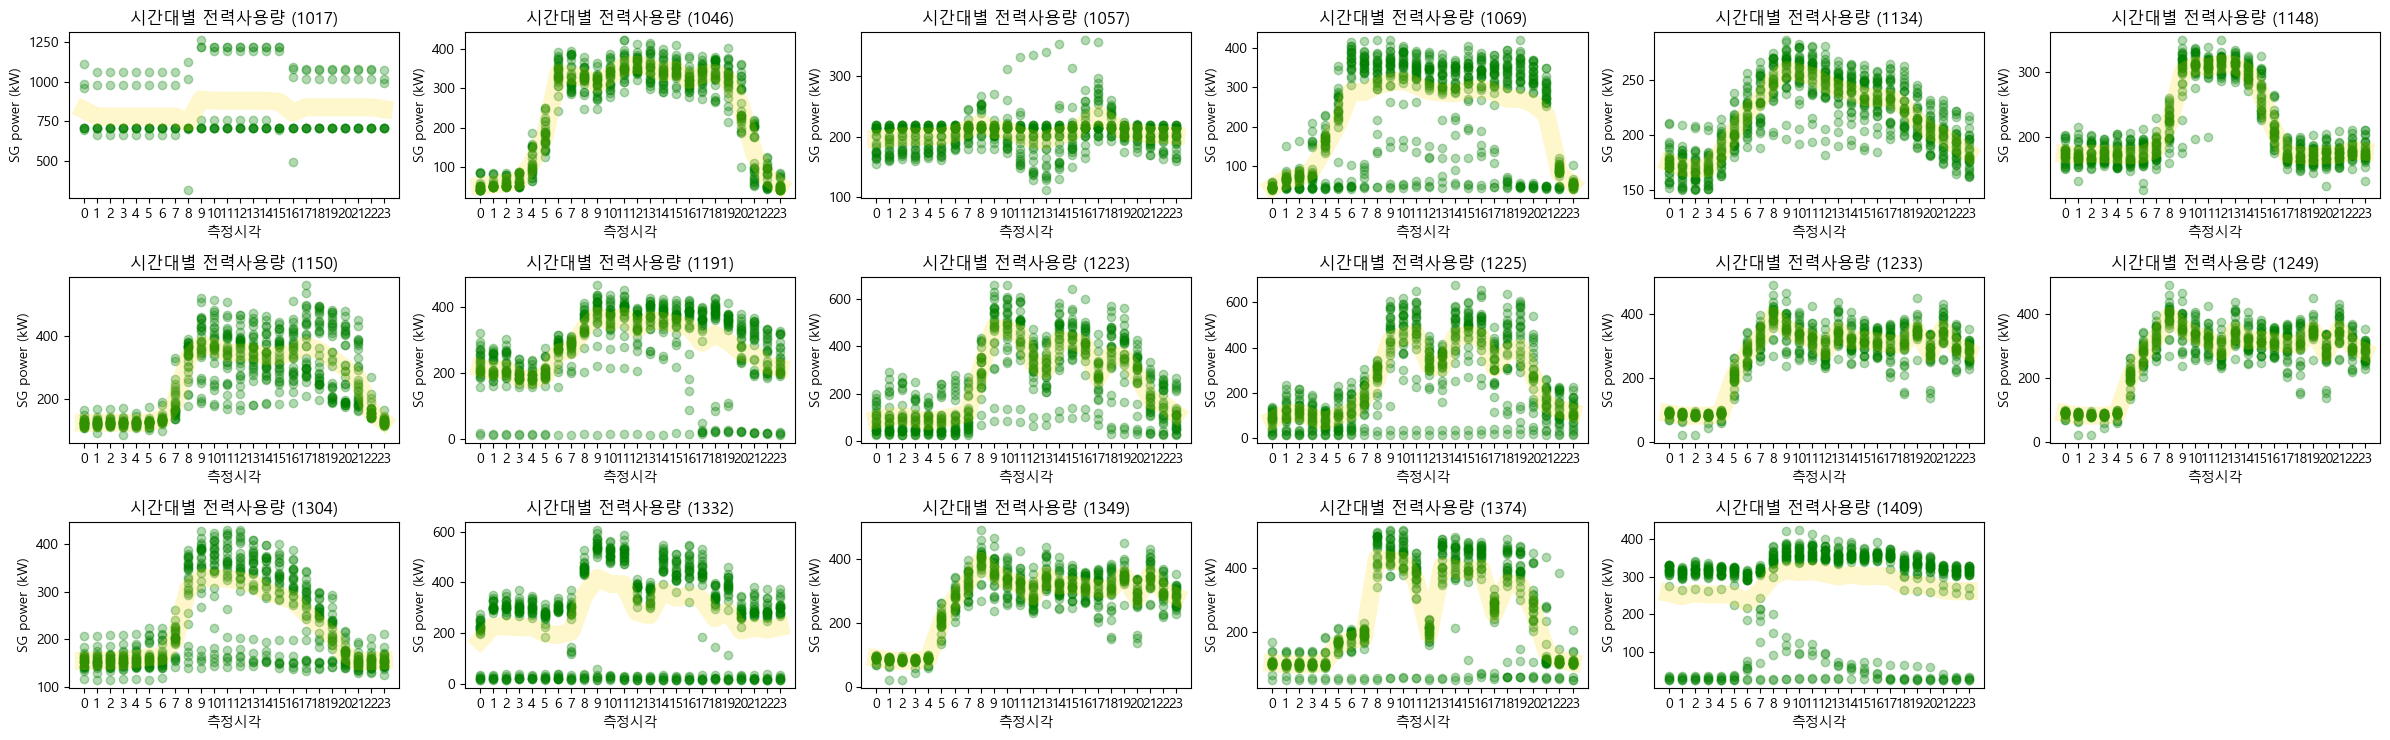

In [127]:
# (2, n) 배열의 subplot을 만들고, 각 subplot에 수용가번호별 시간대별 전력사용량을 그래프로 표시
n = len(indexes)
cols = 6
rows = n // cols + 1
plt.figure(figsize=(24, 2.5 * rows))
for i, num in enumerate(indexes):
    data_num = data_150_200[data_150_200['수용가번호'] == num]
    # data가 0인 데이터 제거
    data_num = data_num[data_num['SG전력사용량'] > 0]
    # 일자별 SG전력사용량
    plt.subplot(rows, cols, i + 1)
    for date in data_num['측정일자'].unique():
        data_num_date = data_num[data_num['측정일자'] == date]
        # plt.plot(data_num_date['측정시각'], data_num_date['SG전력사용량'], label=date, alpha=0.5, color = 'green')
        plt.scatter(data_num_date['측정시각'], data_num_date['SG전력사용량'], alpha=0.3, color = 'green')
    
    # 측정 시간별 평균 SG전력사용량
    data_num_mean = data_num.groupby('측정시각')['SG전력사용량'].mean()
    
    plt.plot(data_num_mean.index, data_num_mean.values, color='gold', label='평균', alpha=0.2, linewidth=13)
        
    plt.xlabel('측정시각')
    plt.xticks(range(24), range(24))
    plt.ylabel('SG power (kW)')
    plt.title(f"시간대별 전력사용량 ({num})")
plt.tight_layout()
plt.show()